# TSA HW06
R10A21126 WANG YIFAN

In [1]:
# install.packages("TSA")
library("TSA");

Warning message:
"package 'TSA' was built under R version 4.2.2"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




## Q1
### Simulate a time series $y_t$ of length $n = 100$ following an ARMA(1,1) model with $\phi = 0.8$ and $\theta = 0.4$.

### (a) Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible.


In [2]:
set.seed(130930); options(repr.plot.width=10, repr.plot.height=3) # modify the plot size

In [3]:
series=arima.sim(n=100,list(ar=0.8,ma=-0.4))

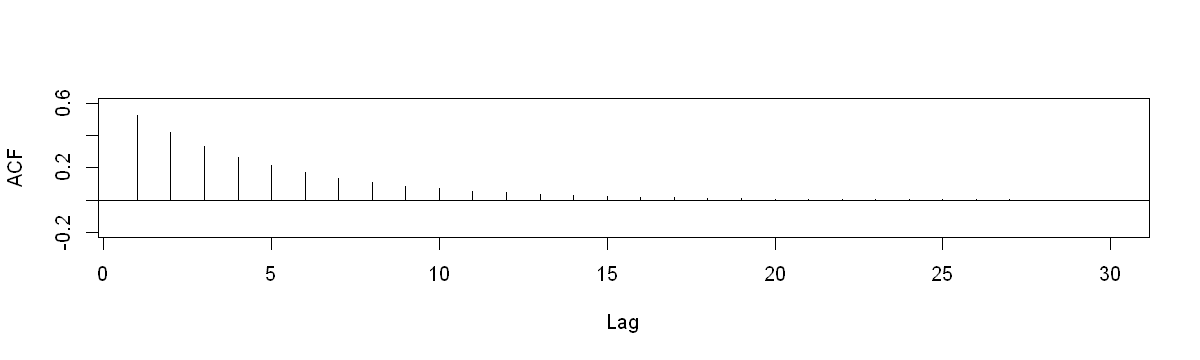

In [4]:
phi=0.8; 
theta=0.4; 
ACF=ARMAacf(ar=phi,ma=-theta,lag.max=30)
plot(y=ACF[-1],x=1:30,xlab='Lag',ylab='ACF',type='h',ylim=c(-.2,.6)); abline(h=0)


### (b) Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?



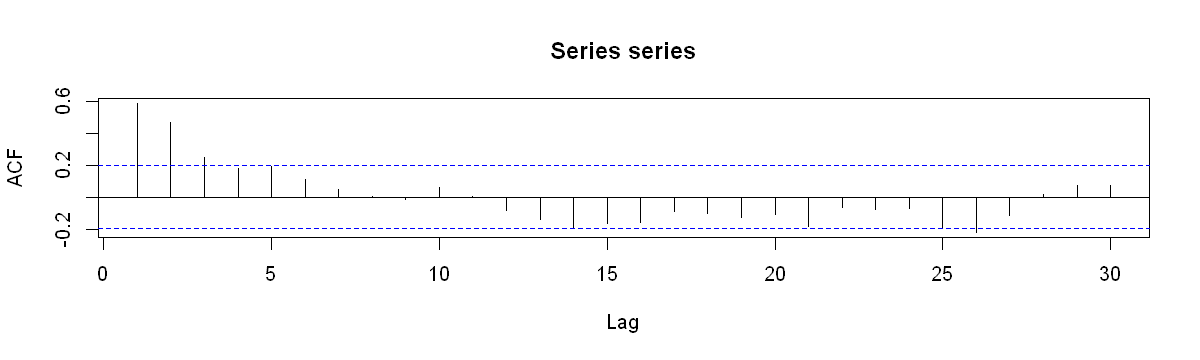

In [5]:
 acf(series,lag.max=30)

The sample acf generally matches the pattern of the theoretical acf for the first 10 or so lags but, as is quite typical, it displays spurious autocorrelation at higher lags.


### (c) Calculate and interpret the sample EACF for this series. Does the EACF help you specify the correct orders for the model?


In [6]:
eacf(series)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x o o o o o o o o  o  o  o 
1 x x o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x o o o o o o o o o o  o  o  o 
4 x x x o o o o o o o o  o  o  o 
5 x x o x o o o o o o o  o  o  o 
6 x x x o o o o o o o o  o  o  o 
7 x o o o o o o o o o o  o  o  o 


This sample EACF points to the mixed ARMA(2,1).



### (d) Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size n = 48.


In [7]:
series=arima.sim(n=48,list(ar=0.8,ma=-0.4))

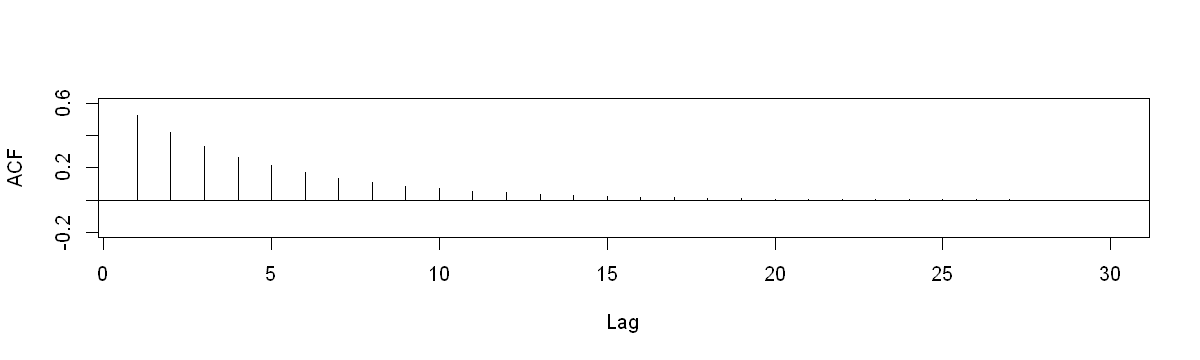

In [8]:
phi=0.8; 
theta=0.4; 
ACF=ARMAacf(ar=phi,ma=-theta,lag.max=30)
plot(y=ACF[-1],x=1:30,xlab='Lag',ylab='ACF',type='h',ylim=c(-.2,.6)); abline(h=0)

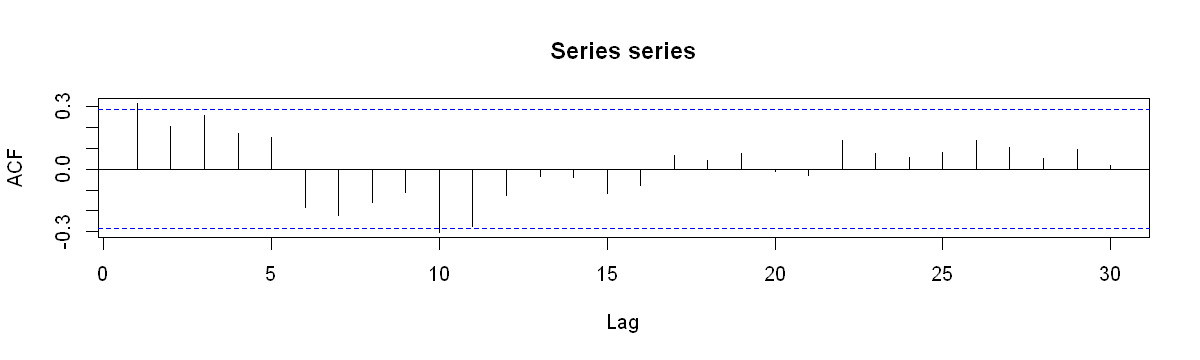

In [9]:
 acf(series,lag.max=30)

The sample acf generally matches the pattern of the theoretical acf for the first 5 or so lags but, as is quite typical, it displays spurious autocorrelation at higher lags.

In [10]:
eacf(series)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 o o o o o o o o o o o  o  o  o 
4 x o o o o o o o o o o  o  o  o 
5 o o x o x o o o o o o  o  o  o 
6 x o o o o o o o o o o  o  o  o 
7 x o o o o o o o o o o  o  o  o 


This sample EACF points to the mixed ARMA(0,1).



### (e) Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size n = 200.

In [11]:
series=arima.sim(n=200,list(ar=0.8,ma=-0.4))

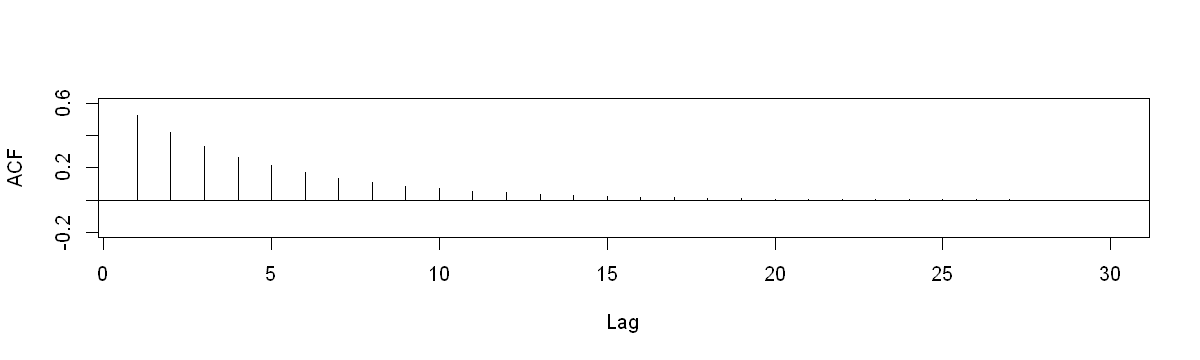

In [12]:
phi=0.8; 
theta=0.4; 
ACF=ARMAacf(ar=phi,ma=-theta,lag.max=30)
plot(y=ACF[-1],x=1:30,xlab='Lag',ylab='ACF',type='h',ylim=c(-.2,.6)); abline(h=0)

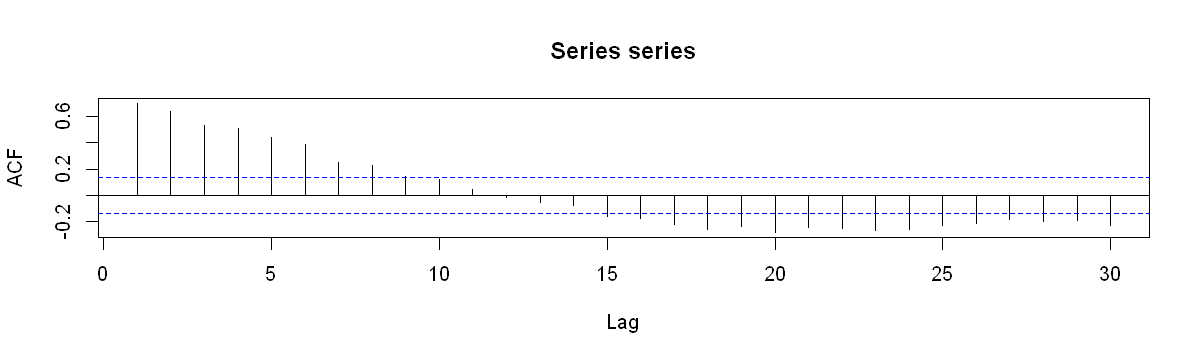

In [13]:
 acf(series,lag.max=30)

The sample acf generally matches the pattern of the theoretical acf for the first 10 or so lags but, as is quite typical, it displays spurious autocorrelation at higher lags.

In [14]:
eacf(series)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x o o  o  o  o 
1 x o x o o x x o o o o  o  o  o 
2 o x o o o x o o o o o  o  o  o 
3 x x x o o x o o o o o  o  o  o 
4 o x o o o x o o o o o  o  o  o 
5 o o x o x o o o o o o  o  o  o 
6 o o x o x x o o o o o  o  o  o 
7 x x o x x o o o o o o  o  o  o 


This sample EACF points to the mixed ARMA(1,1) quite well.

## Q2
###  Simulate an ARMA(1,1) series with $\phi = 0.7$, $\theta = −0.6$, $n = 48$ but with error terms from a t-distribution with 6 degrees of freedom.

In [15]:
n=48
series=arima.sim(n=n,list(ar=0.7,ma=0.6),innov=rt(n,6))

### (a) Display the sample EACF of the series. Is an ARMA(1,1) model suggested?

In [16]:
 eacf(series)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x o o o o o o x x  x  x  x 
1 x o o o o o o o o o o  o  o  o 
2 x x o x o o o o o o o  o  o  o 
3 x o o x o o o o o o o  o  o  o 
4 x o o o o o o o o o o  o  o  o 
5 x o o o o o o o o o o  o  o  o 
6 x o o o o o o o o o o  o  o  o 
7 o x o o o o o o o o o  o  o  o 


The sample eacf provides a rather clear indication of an ARMA(1,1) model.

###  (b) Estimate $\phi$ and $\theta$ from the series and comment on the results

In [17]:
 arima(series,order=c(1,0,1))


Call:
arima(x = series, order = c(1, 0, 1))

Coefficients:
         ar1    ma1  intercept
      0.6773  0.602    -0.0678
s.e.  0.1148  0.099     0.8975

sigma^2 estimated as 1.73:  log likelihood = -82.13,  aic = 170.27

In spite of the nonnormal errors, maximum “likelihood” produces excellent estimates of the $\phi$ and $\theta$ parameters.

## Q3
### The data file named robot contains a time series obtained from an industrial robot. The robot was put through a sequence of maneuvers, and the distance from a desired ending point was recorded in inches. 

### (a) Display the time series plot of the data. Based on this information, do these data appear to come from a stationary or nonstationary process?

In [18]:
data(robot)

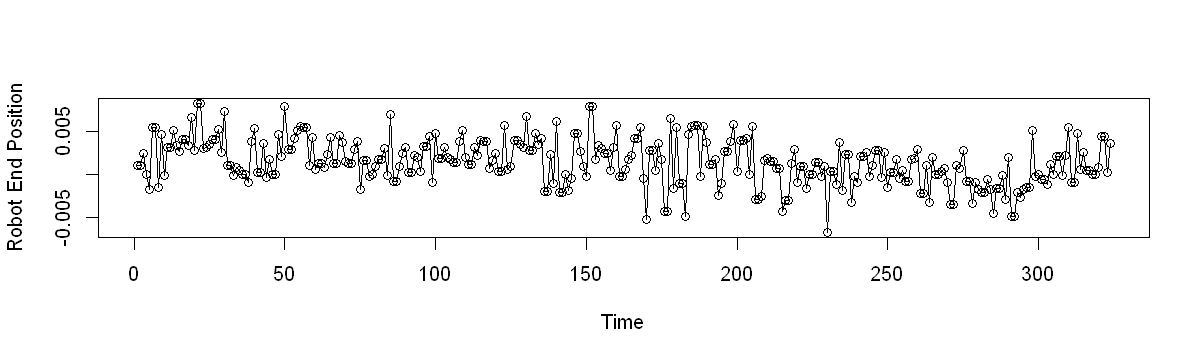

In [19]:
plot(robot,type='o',ylab='Robot End Position')

From this plot we might try a stationary model but there is also enough “drift” that we might also suspect nonstationarity.

### (b) Calculate and plot the sample ACF and PACF for these data. Based on this additional information, do these data appear to come from a stationary or nonstationary process?

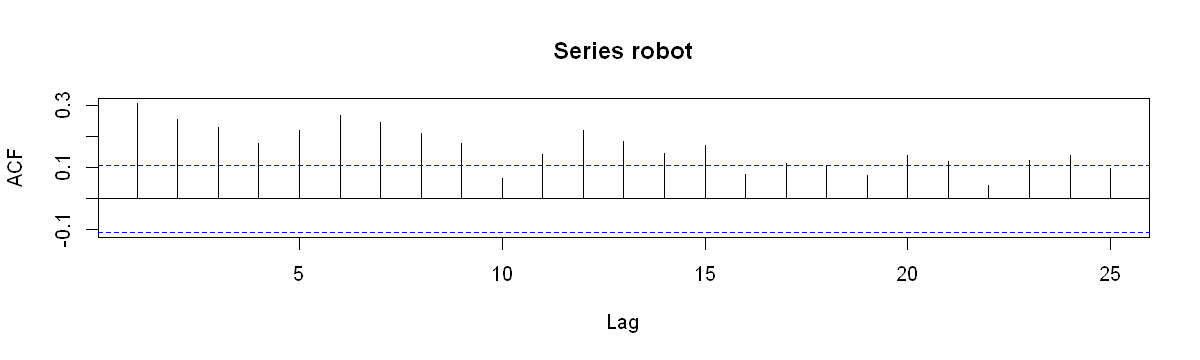

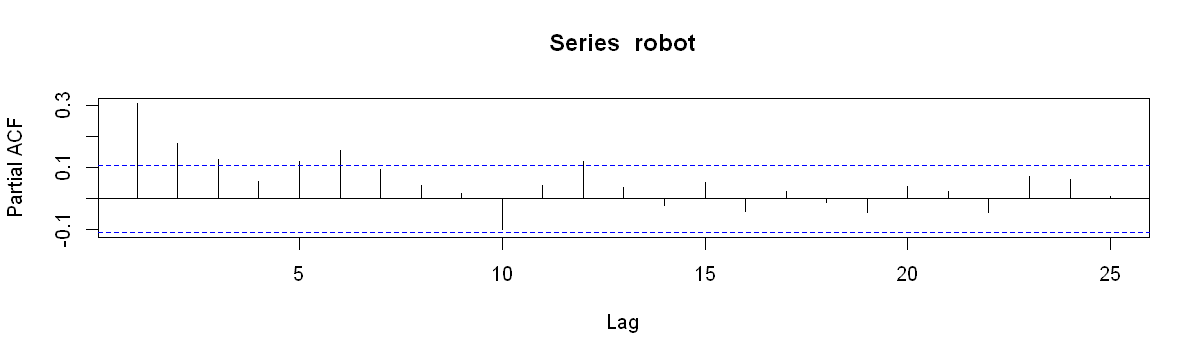

In [20]:
acf(robot)
pacf(robot)


These plots are are not especially definitive, but the pacf suggests possibly an AR(3) model for the series

### (c) Calculate and interpret the sample EACF

In [21]:
eacf(robot)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x o x  x  x  x 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x x x x o o o o o o o  o  x  o 
5 x x x o o o o o o o o  o  x  o 
6 x o o o o x o o o o o  o  o  o 
7 x o o x o x x o o o o  o  o  o 


The EACF suggests an ARMA(1,1) model.

### (d.1) Estimate the parameters of an AR(1) model for these data.

In [27]:
ar1 = arima(robot,order=c(1,0,0))
ar1


Call:
arima(x = robot, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.3074     0.0015
s.e.  0.0528     0.0002

sigma^2 estimated as 6.482e-06:  log likelihood = 1475.54,  aic = -2947.08

$$y_t=0.3074y_{t-1}+a_t+0.0015$$

### (d.2) Estimate the parameters of an IMA(1,1) model for these data.

In [40]:
ima11 = arima(robot,order=c(0,1,1))
ima11


Call:
arima(x = robot, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.8713
s.e.   0.0389

sigma^2 estimated as 6.069e-06:  log likelihood = 1480.95,  aic = -2959.9

$$y_t=a_t-0.8713a_{t-1}$$

### (e) Compare the results from part (d) in terms of AIC.

Although the log likelihoods and AIC values are very close to each other, the IMA(1,1) model has a slightly smaller AIC value, implying that the IMA(1,1) model is slightly better then the AR(1) model. 
The AR(1) model uses one more independent variable (intercept) than the IMA(1,1) model.